<a href="https://colab.research.google.com/github/iorn121/ImageProcessing100Questions/blob/main/ImageProcessing1_10Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

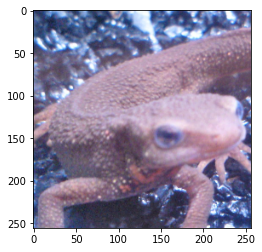

In [1]:
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt


img_origin=io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
plt.imshow(img_origin)
plt.show()

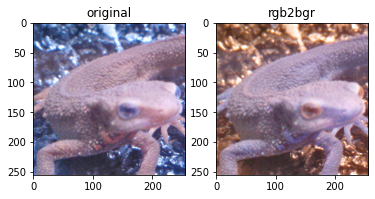

In [2]:
# Q1
def rgb2bgr(img):
  return img[...,::-1]

img_bgr=rgb2bgr(img_origin)
plt.subplot(1,2,1)
plt.imshow(img_origin)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_bgr)
plt.title("rgb2bgr")
plt.show()

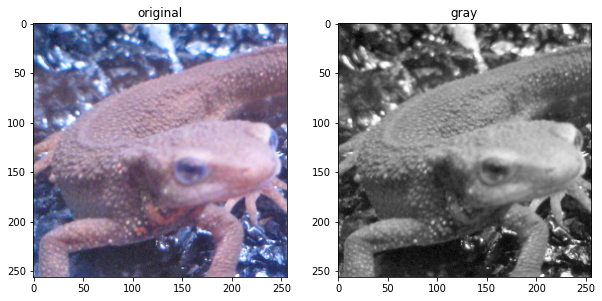

In [3]:
# Q2
# img_gray=cv2.cvtColor(img_origin,cv2.COLOR_RGB2GRAY)
def rgb2gray(img):
  _img=img.copy().astype(np.float32)
  gray=_img[...,0]*0.2126+_img[...,1]*0.7152+_img[...,2]*0.0722
  gray=np.clip(gray,0,255)
  return gray.astype(np.uint8)
img_gray=rgb2gray(img_origin)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_origin)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_gray,cmap="gray")
plt.title("gray")
plt.show()

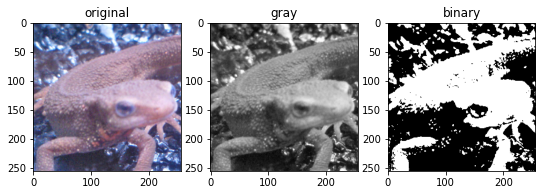

In [4]:
# Q3
# th,img_bin=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
def binary(img,th):
  _img=img.copy()
  _img=np.minimum(_img//th,1)*255
  return _img.astype(np.uint8)
img_bin=binary(img_gray,127)
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img_origin)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(img_gray,cmap="gray")
plt.title("gray")
plt.subplot(1,3,3)
plt.imshow(img_bin,cmap="gray")
plt.title("binary")
plt.show()

In [5]:
# Q4
# th,img_bin=cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
def otsu_thresh(img):
  max_var=-1
  max_th=0
  for th in range(1,254):
    m0=img[img<=th].mean()
    m1=img[img>th].mean()
    w0=img[img<=th].size
    w1=img[img>th].size
    var=w0*w1/((w0+w1)**2)*((m0-m1)**2)
    if var>max_var:
      max_var=var
      max_th=th
  img=binary(img,max_th)
  return max_th,img

th,img_bin=otsu_thresh(img_gray)
print("threshold >>",th)

threshold >> 127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


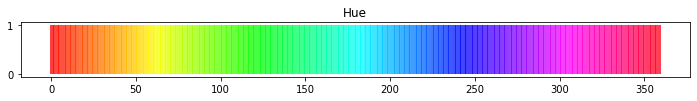

In [6]:
from matplotlib import cm
plt.figure(figsize=(12,1))
plt.title("Hue")
for i in range(360):
  plt.vlines(i,0,1,color=cm.hsv(i/360))

plt.show()

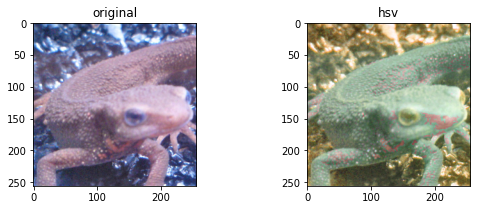

In [7]:
# Q5
hsv=cv2.cvtColor(img_origin,cv2.COLOR_RGB2HSV)
hsv[...,0]=(hsv[...,0]+90)%180
img_hsv=cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,2,2)
plt.title("hsv")
plt.imshow(img_hsv)
plt.show()

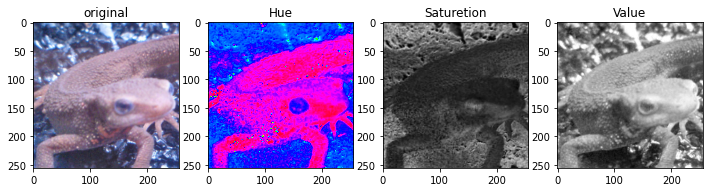

In [8]:
hsv=cv2.cvtColor(img_origin,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,4,2)
plt.title("Hue")
plt.imshow(hsv[...,0]/360,cmap="hsv")
plt.subplot(1,4,3)
plt.title("Saturetion")
plt.imshow(hsv[...,1],cmap="gray")
plt.subplot(1,4,4)
plt.title("Value")
plt.imshow(hsv[...,2],cmap="gray")
plt.show()

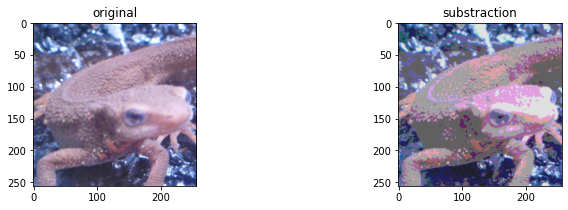

In [9]:
# Q6
def color_substraction(img,div=4):
  th=256//div
  return np.clip(img//th*th+th//2,0,255)

img_sub=color_substraction(img_origin,4)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,2,2)
plt.title("substraction")
plt.imshow(img_sub)
plt.show()

h: 256, w: 256, ksize_h: 8, ksize_w: 8, outer_h: 0, outer_w: 0


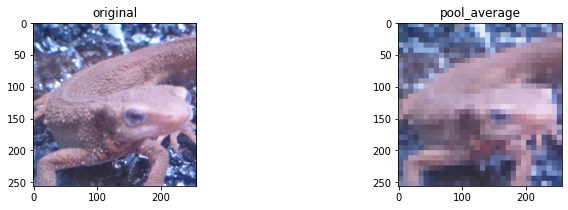

In [12]:
# Q7
def pool_average(img,ksize_h=8,ksize_w=8):
  _img=img.copy().astype(np.float32)

  h,w=img.shape[:2]
  outer_h=h%ksize_h
  pad_top=outer_h//2
  pad_bottom=outer_h-pad_top
  outer_w=w%ksize_w
  pad_left=outer_w//2
  pad_right=outer_w-pad_left

  print(f"h: {h}, w: {w}, ksize_h: {ksize_h}, ksize_w: {ksize_w}, outer_h: {outer_h}, outer_w: {outer_w}")

  _img=np.pad(_img,[(pad_top,pad_bottom),(pad_left,pad_right),(0,0)],"edge")
  out=np.zeros_like(_img)
  new_h,new_w=out.shape[:2]
  c=1 if len(out.shape)==2 else out.shape[2]

  for iy in range(0,new_h,ksize_h):
    for ix in range(0,new_w,ksize_w):
      for ic in range(c):
        out[iy:iy+ksize_h,ix:ix+ksize_w,ic]=_img[iy:iy+ksize_h,ix:ix+ksize_w,ic].mean()
  
  out=out[pad_top:pad_top+h,pad_left:pad_left+w]
  return np.clip(out,0,255).astype(np.uint8)


img_pool=pool_average(img_origin)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,2,2)
plt.title("pool_average")
plt.imshow(img_pool)
plt.show()

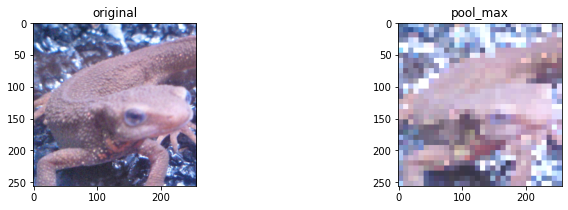

In [13]:
def pool_max(img,ksize_h=8,ksize_w=8):
  _img=img.copy().astype(np.float32)

  h, w = img.shape[:2]
  outer_h = h % ksize_h
  pad_top = outer_h // 2
  pad_bottom = outer_h - pad_top
  outer_w = w % ksize_w
  pad_left = outer_w // 2
  pad_right = outer_w - pad_left

  _img=np.pad(_img,[(pad_top,pad_bottom),(pad_left,pad_right),(0,0)],"edge")
  out=np.zeros_like(_img)

  new_h,new_w=out.shape[:2]
  c=1 if len(out.shape) == 2 else out.shape[2]

  for iy in range(0,new_h,ksize_h):
    for ix in range(0,new_w,ksize_w):
      for ic in range(c):
        out[iy:iy+ksize_h,ix:ix+ksize_w,ic]=_img[iy:iy+ksize_h,ix:ix+ksize_w,ic].max()
  out=out[pad_top:pad_top+h,pad_left:pad_left+w]
  return np.clip(out,0,255).astype(np.uint8)

img_pool=pool_max(img_origin)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img_origin)
plt.subplot(1,2,2)
plt.title("pool_max")
plt.imshow(img_pool)
plt.show()

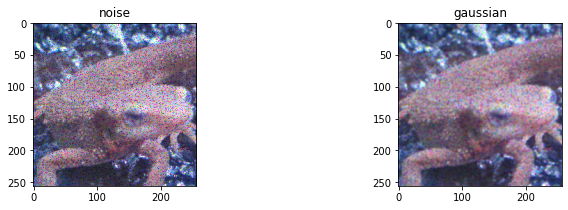

In [15]:
# Q9
img_noise_origin=io.imread("https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png")

img_gau=cv2.GaussianBlur(img_noise_origin,(3,3),1.3)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("noise")
plt.imshow(img_noise_origin)
plt.subplot(1,2,2)
plt.title("gaussian")
plt.imshow(img_gau)
plt.show()

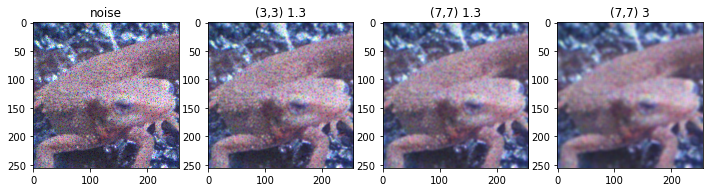

In [16]:
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title("noise")
plt.imshow(img_noise_origin)
plt.subplot(1,4,2)
plt.title("(3,3) 1.3")
plt.imshow(img_gau)
img_gau=cv2.GaussianBlur(img_noise_origin,(7,7),1.3)
plt.subplot(1,4,3)
plt.title("(7,7) 1.3")
plt.imshow(img_gau)
img_gau=cv2.GaussianBlur(img_noise_origin,(7,7),3)
plt.subplot(1,4,4)
plt.title("(7,7) 3")
plt.imshow(img_gau)
plt.show()